In [1]:
using NetworkDiscovery
using POMDPs
using POMDPToolbox
using POMCP
rng = MersenneTwister(11);

In [2]:
p_intra = 0.3;
p_inter = 0.01;

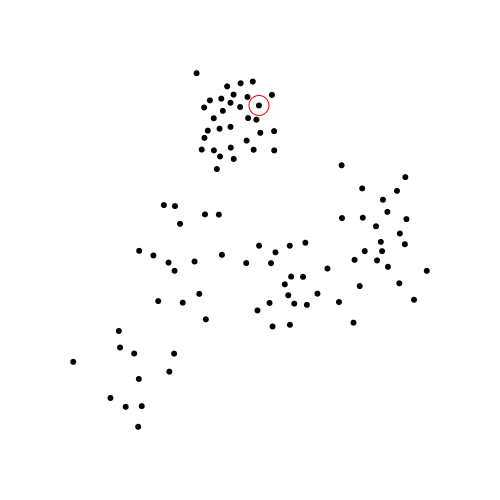

In [3]:
nw = generate_network(rng, 100, 5, p_intra, p_inter)

In [4]:
pomdp = generate_problem(rng, nw, 10, 1, 100.0, 4, 4, p_intra, p_inter)

CommunityAffiliationPOMDP(10,1,100.0,CommunityNetwork({100, 374} undirected graph,5,[3,3,5,4,2,2,3,4,5,1  …  5,5,4,2,1,1,3,2,3,1],10),Set{Int64}({4,32,72,27,62,8,82,1}),Set{Pair{Int64,Int64}}({edge 4 - 8,edge 1 - 32,edge 27 - 82,edge 62 - 72}),[32=>3,72=>3,82=>2],0.3,0.01)

In [5]:
rollout_rng = MersenneTwister(1)
pomcp_rng = MersenneTwister(1)
rollout_policy = DiscoveryHeuristic(ProbeHighestDegree(true), GuessBasedOnNeighbors(rollout_rng))
solver = POMCPSolver(rollout_policy, 0.0, 100.0, 100, pomcp_rng, false, FullBeliefConverter(), 0)
policy = solve(solver, pomdp)

POMCPPolicy(CommunityAffiliationPOMDP(10,1,100.0,CommunityNetwork({100, 374} undirected graph,5,[3,3,5,4,2,2,3,4,5,1  …  5,5,4,2,1,1,3,2,3,1],10),Set{Int64}({4,32,72,27,62,8,82,1}),Set{Pair{Int64,Int64}}({edge 4 - 8,edge 1 - 32,edge 27 - 82,edge 62 - 72}),[32=>3,72=>3,82=>2],0.3,0.01),POMCPSolver(DiscoveryHeuristic(ProbeHighestDegree(true),GuessBasedOnNeighbors(MersenneTwister(DSFMT_state(Int32[1749029653,1072851681,1610647787,1072862326,1841712345,1073426746,-198061126,1073322060,-156153802,1073567984  …  1977574422,1073209915,278919868,1072835605,1290372147,18858467,1815133874,-1716870370,382,0]),Uint32[0x00000001]))),0.0,100.0,100,MersenneTwister(DSFMT_state(Int32[1749029653,1072851681,1610647787,1072862326,1841712345,1073426746,-198061126,1073322060,-156153802,1073567984  …  1977574422,1073209915,278919868,1072835605,1290372147,18858467,1815133874,-1716870370,382,0]),Uint32[0x00000001]),false,FullBeliefConverter(),0),nothing)

In [6]:
revealed = initial_belief(pomdp)

RevealedGraph(Set{Pair{Int64,Int64}}({edge 4 - 8,edge 1 - 32,edge 27 - 82,edge 62 - 72}),[[32],[],[],[8],[],[],[],[4],[],[]  …  [],[],[],[],[],[],[],[],[],[]],Set{Int64}({4,32,72,27,62,8,82,1}),[32=>3,72=>3,82=>2],Set{Int64}({}),10,0.3,0.01,5)

In [7]:
sim = HistoryRecorder(rng=rng, initial_state=nw, initial_belief=revealed)
simulate(sim, pomdp, policy)

100.0

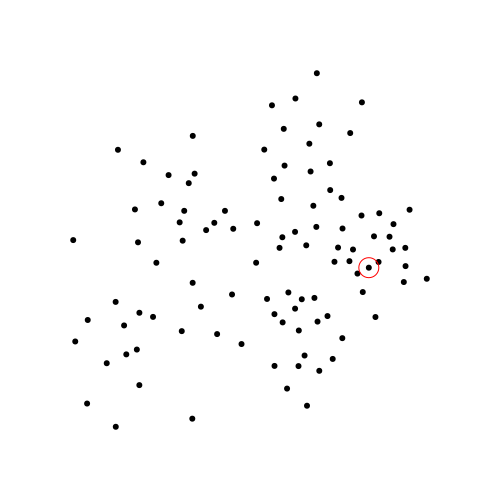

In [8]:
endnw = CommunityNetwork()
rand!(MersenneTwister(3), endnw, sim.belief_hist[end])
endnw

In [9]:
sim.action_hist

11-element Array{Any,1}:
 ProbeNode(72)      
 ProbeNode(51)      
 ProbeNode(27)      
 ProbeNode(12)      
 ProbeNode(23)      
 ProbeNode(90)      
 ProbeNode(8)       
 ProbeNode(9)       
 ProbeNode(77)      
 ProbeNode(46)      
 GuessAffiliation(3)